In [242]:
from Utilities import Statistics as statistics
import os
import json
from Entity.Flight import Flight
from datetime import datetime
from Utilities import General

### Graph before labeling


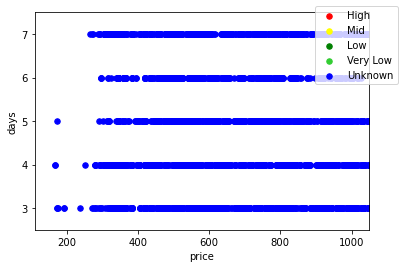

In [243]:
destination="MILA"

statistics.get_statistic_of_destination(destination)

### Load the data of destination

In [244]:
with open(os.path.dirname(os.path.abspath("__file__")) +
          '/../Data/Flights/json_files_dict.json', 'r') as f:
    dict = json.load(f)
with open(os.path.dirname(os.path.abspath("__file__")) +
          '/../Data/Flights/airports_countries.json', 'r') as f2:
    shortcut_dict = json.load(f2)
if destination in shortcut_dict:
    fullname_airport = shortcut_dict[destination]['airportName']
    list = dict[fullname_airport]
    flights_data = []
    for json_file in list:
        with open(os.path.dirname(os.path.abspath("__file__"))
                  + "/../" + json_file) as f:
         data = json.load(f)
        for temp in data:
            flights_data.append((Flight(**temp),json_file))
else:
    raise SystemExit("The destination is not found!")
print(f'The length of data is: {str(len(flights_data))}')
check_data_labeled=[item for item in flights_data if item[0].label==-1]
if len(check_data_labeled)==0:
    raise SystemExit("Data is labeled!")
else:
    print('Data is not labeled')

The length of data is: 11812
Data is not labeled


### The length of data

In [245]:
dict_flights_per_days= {}
for flight in flights_data:
    flight_days=(datetime.strptime(flight[0].return_date, '%Y-%m-%d')
    -datetime.strptime(flight[0].depart_date,'%Y-%m-%d')).days
    try:
        dict_flights_per_days[flight_days].append(flight)
    except KeyError:
        dict_flights_per_days[flight_days]=[]
        dict_flights_per_days[flight_days].append(flight)

for ele,val in dict_flights_per_days.items():
    print(f"{str(ele)} days: {str(len(val))} ")

2 days: 812 
1 days: 565 
3 days: 994 
4 days: 873 
7 days: 1067 
6 days: 633 
10 days: 625 
9 days: 675 
13 days: 360 
12 days: 531 
5 days: 818 
8 days: 524 
21 days: 331 
20 days: 201 
18 days: 277 
17 days: 317 
16 days: 381 
15 days: 298 
14 days: 624 
11 days: 530 
19 days: 293 
0 days: 58 
23 days: 7 
28 days: 11 
25 days: 2 
22 days: 1 
27 days: 2 
29 days: 2 


### Filter the irrelevant data

In [246]:
for ele,val in dict_flights_per_days.items():
    for item in val:
        if ele<3 or ele>7:
            item[0].label=0
for item in dict_flights_per_days[2][:5]:
    print(item[0])

Flight:: departure:  Airport:: name: Ben Gurion Airport code: TLV
Country:: name: Israel code: IL
destination:  Airport:: name: All Milano Airports code: MILA
Country:: name: Italy code: IT
depart date:  2021-03-01 return date:  2021-03-03
price:  345 label:  0
Flight:: departure:  Airport:: name: Ben Gurion Airport code: TLV
Country:: name: Israel code: IL
destination:  Airport:: name: All Milano Airports code: MILA
Country:: name: Italy code: IT
depart date:  2021-03-02 return date:  2021-03-04
price:  689 label:  0
Flight:: departure:  Airport:: name: Ben Gurion Airport code: TLV
Country:: name: Israel code: IL
destination:  Airport:: name: All Milano Airports code: MILA
Country:: name: Italy code: IT
depart date:  2021-03-09 return date:  2021-03-11
price:  689 label:  0
Flight:: departure:  Airport:: name: Ben Gurion Airport code: TLV
Country:: name: Israel code: IL
destination:  Airport:: name: All Milano Airports code: MILA
Country:: name: Italy code: IT
depart date:  2021-03-12

### Items per class:

In [247]:
relevant_data= {}
with open(os.path.dirname(os.path.abspath("__file__")) +
          '/../Data/Flights/dict_rates_label.json', 'r') as f:
    dict_rates = json.load(f)
if destination not in dict_rates:
        dict_rates[destination]={}
        check_write_rates=True
for num_days in range(3,8):
    sorted_flight_per_day=sorted(dict_flights_per_days[num_days],
                                 key=lambda x: (x[0]).price)
    length_list=len(sorted_flight_per_day)
    print(f'{num_days} days have {str(length_list)}'
          f' items :')
    if check_write_rates:
        if num_days==3:
            mid_rate=0.50
            low_rate=0.25
            very_low_rate=0.1
        elif num_days==4:
            mid_rate=0.55
            low_rate=0.3
            very_low_rate=0.15
        elif num_days==5:
            mid_rate=0.52
            low_rate=0.2
            very_low_rate=0.10
        elif num_days==6:
            mid_rate=0.50
            low_rate=0.3
            very_low_rate=0.12
        elif num_days==7:
            mid_rate=0.55
            low_rate=0.15
            very_low_rate=0.02
        dict_rates[destination][num_days]= {'very low rate': very_low_rate,
                                      'low rate': low_rate,
                                      'mid rate': mid_rate}
    else:
        very_low_rate=dict_rates[destination][num_days]['very low rate']
        low_rate=dict_rates[destination][num_days]['low rate']
        mid_rate=dict_rates[destination][num_days]['mid rate']
        check_write_rates=False
    very_low_list=sorted_flight_per_day[0:int(length_list * very_low_rate)]
    low_list=sorted_flight_per_day[int(length_list * very_low_rate):
                                   int(length_list * low_rate)]
    mid_list=sorted_flight_per_day[int(length_list * low_rate):
                                   int(length_list * mid_rate)]
    high_list=sorted_flight_per_day[int(length_list * mid_rate):
                                   int(length_list)]
    print(f'{str(len(high_list))} in high class \n'
          f'{str(len(mid_list))} in mid class \n'
          f'{str(len(low_list))} in low class \n'
          f'{str(len(very_low_list))} in very low class \n')
    relevant_data[num_days]= {}
    relevant_data[num_days]['high rate']=high_list
    relevant_data[num_days]['mid rate']=mid_list
    relevant_data[num_days]['low rate']=low_list
    relevant_data[num_days]['very low rate']=very_low_list

if check_write_rates:
    with open(os.path.dirname(os.path.abspath("__file__")) +
          '/../Data/Flights/dict_rates_label.json', 'w', encoding='utf-8') as fp:
        json.dump(dict_rates, fp,ensure_ascii=False, indent=4)

3 days have 994 items :
497 in high class 
249 in mid class 
149 in low class 
99 in very low class 

4 days have 873 items :
393 in high class 
219 in mid class 
131 in low class 
130 in very low class 

5 days have 818 items :
393 in high class 
262 in mid class 
82 in low class 
81 in very low class 

6 days have 633 items :
317 in high class 
127 in mid class 
114 in low class 
75 in very low class 

7 days have 1067 items :
481 in high class 
426 in mid class 
139 in low class 
21 in very low class 



### Price range per class

In [248]:
for day in range(3,8):
    print(f'{day} days:')
    try:
        print(f'very low prices: '
              f'{str(int(relevant_data[day]["very low rate"][0][0].price))}-'
          f'{str(int(relevant_data[day]["very low rate"][-1][0].price))}')
    except:
        pass
    try:
        print(f'low prices:{str(int(relevant_data[day]["low rate"][0][0].price))}-'
          f'{str(int(relevant_data[day]["low rate"][-1][0].price))}')
    except:
        pass
    try:
        print(f'mid prices:{str(int(relevant_data[day]["mid rate"][0][0].price))}-'
          f'{str(int(relevant_data[day]["mid rate"][-1][0].price))}')
    except:
        pass
    try:
        print(f'high prices:{str(int(relevant_data[day]["high rate"][0][0].price))}-'
          f'{str(int(relevant_data[day]["high rate"][-1][0].price))}\n')
    except:
        pass



3 days:
very low prices: 174-345
low prices:345-486
mid prices:490-689
high prices:689-3465

4 days:
very low prices: 167-382
low prices:383-516
mid prices:517-701
high prices:710-3544

5 days:
very low prices: 174-462
low prices:466-526
mid prices:526-728
high prices:728-3568

6 days:
very low prices: 296-433
low prices:434-557
mid prices:559-691
high prices:692-4626

7 days:
very low prices: 267-314
low prices:314-419
mid prices:420-770
high prices:771-2179



### Label data

In [249]:
for day in range(3,8):
    for item in relevant_data[day]["very low rate"]:
        item[0].label=4
    for item in relevant_data[day]["low rate"]:
        item[0].label=3
    for item in relevant_data[day]["mid rate"]:
        item[0].label=2
    for item in relevant_data[day]["high rate"]:
        item[0].label=1
    test_list=[item for item in dict_flights_per_days[day] if item[0].label==-1]
    if len(test_list)!=0:
        print(f'{day} days:Fail,there are leaks in data')
    else:
        print(f'{day} days:Successful')



3 days:Successful
4 days:Successful
5 days:Successful
6 days:Successful
7 days:Successful


### Write down the data to files

In [250]:
data_list=[ele for key,val in dict_flights_per_days.items() for ele in val]
test_data_list=[item for item in data_list if item[0].label==-1]
if len(test_data_list)==0:
    print("The data is valid and start write the data to files")
    dict_flights_per_files={}
    for item in data_list:
        if item[1] in dict_flights_per_files:
            dict_flights_per_files[item[1]].append(item[0])
        else:
            dict_flights_per_files[item[1]]=[]
            dict_flights_per_files[item[1]].append(item[0])
    for json_file,flights in dict_flights_per_files.items():
        with open(os.path.dirname(os.path.abspath("__file__"))
                  + "/../" + json_file,'w',encoding='utf-8') as f:
            json.dump(flights, f, ensure_ascii=False, default=General.obj_dict, indent=4)

The data is valid and start write the data to files


### Validation for writing data

In [251]:
with open(os.path.dirname(os.path.abspath("__file__")) +
          '/../Data/Flights/json_files_dict.json', 'r') as f:
    dict = json.load(f)
with open(os.path.dirname(os.path.abspath("__file__")) +
          '/../Data/Flights/airports_countries.json', 'r') as f2:
    shortcut_dict = json.load(f2)
if destination in shortcut_dict:
    fullname_airport = shortcut_dict[destination]['airportName']
    list = dict[fullname_airport]
    flights_data_valid = []
    for json_file in list:
        with open(os.path.dirname(os.path.abspath("__file__"))
                  + "/../" + json_file) as f:
         data = json.load(f)
        for temp in data:
            flights_data_valid.append((Flight(**temp),json_file))
else:
    raise SystemExit("The destination is not found!")
if len(flights_data_valid)==len(flights_data):
    print("Successful write data")
else:
    print("Failed write data")

Successful write data


### Graph after labeling

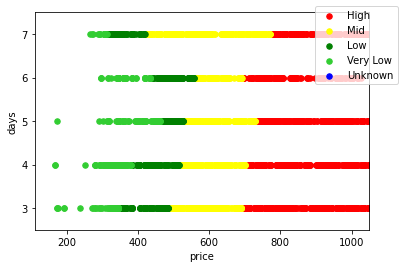

In [252]:
statistics.get_statistic_of_destination(destination)


